# Methylation of Genomic Features

In [3]:
library(tidyverse)
library(dplyr)
library(rtracklayer)
library(tibble)

generate counts matrix for CG motifs, look for overlap with genomic features

we're looking at just where is methylation occuring in my samples

In [2]:
!CG_motif="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/C_virginica-3.0_CG-motif.bed"

!input_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences"

!output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/CG_coverage/"

In [ ]:
!bedtools multicov -bams *.bam -bed $CG_motif > ${output_dir}CG_coverage.csv

read in genomic features BED files

# Methylation level in gene features
I would like to know what percent of methylation is happening in exons/introns/etc. To do this, I'm going to use `bedtools multicov` to generate coverage files for each sample with bed files of the different gene features. Then, calculate the number of features with methylation and number without to get our methylation level.

In [1]:
!module load conda/latest

Removing conda
Loading conda


In [2]:
!conda activate bedtools


CondaError: Run 'conda init' before 'conda activate'



In [ ]:
output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/"
exon_bed="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_exon_sorted.bed"
intron_bed="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_intron.bed"
input_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/"

In [ ]:
# hypoxic control
!HC_files=("2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam" "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam")

# control hypoxic
!CH_files=("2018--WBG-BBB-W56-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam" "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam")

# hypoxic hypoxic 
!HH_files=("2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam" "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam" "2018--BBR-BBY-B26-CV_sorted.bam")

# control control
!CC_files=("2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam") 


generate coverage file/counts matrix for each set of samples

## exons
(run in command line)

In [ ]:
# for all samples
!bedtools multicov -bams /project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/*.bam -bed $exon_bed > ${output_dir}multicov_exon.csv

In [ ]:
output_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/"

In [ ]:
# hypoxic control files
HC_files=("2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam" "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam")

bedtools multicov -bams "${HC_files[@]}" -bed $exon_bed > ${output_dir}HC_multicov_exon.csv

In [ ]:
# control hypoxic files
CH_files=("2018--WBG-BBB-W56-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam" "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam")

bedtools multicov -bams "${CH_files[@]}" -bed $exon_bed > ${output_dir}CH_multicov_exon.csv

In [ ]:
# hypoxic hypoxic files
HH_files=("2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam" "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam" "2018--BBR-BBY-B26-CV_sorted.bam")

bedtools multicov -bams "${HH_files[@]}" -bed $exon_bed > ${output_dir}HH_multicov_exon.csv

In [ ]:
# control control files
CC_files=("2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam")

bedtools multicov -bams "${CC_files[@]}" -bed $exon_bed > ${output_dir}CC_multicov_exon.csv

#### methylation level of exons

(11/20/2024) so this was done with running multicov on the exon bed file - but I've since changed the bed file so this is not accurate - running code again with fixed exon bed file

In [21]:
CC_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_multicov_exon.csv", sep='\t')
CH_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_multicov_exon.csv", sep='\t')
HC_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_multicov_exon.csv", sep='\t')
HH_exon <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_multicov_exon.csv", sep='\t')

In [22]:
# CONTROL CONTROL

# Calculate average counts of last 5 columns
CC_exon$avg_counts <- rowMeans(CC_exon[, tail(names(CC_exon), 5)])

# Remove rows with averages below 5
CC_filtered <- CC_exon[CC_exon$avg_counts >= 5, ]

# Remove temporary average column
CC_filtered$avg_counts <- NULL

CCmethyl_exon <- dim(CC_filtered)[1]
total_exon <- dim(CC_exon)[1]
CC_level <- round((CCmethyl_exon/total_exon)*100, 2)

print(paste(CCmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("exon methylation level of CC:", (CCmethyl_exon)/(total_exon)*100))

[1] "69098 methylated exons and 731278 total exons"
[1] "exon methylation level of CC: 9.44893733983519"


In [17]:
# CONTROL HYPOXIC

# Calculate average counts of last 5 columns
CH_exon$avg_counts <- rowMeans(CH_exon[, tail(names(CH_exon), 5)])

# Remove rows with averages below 5
CH_filtered <- CH_exon[CH_exon$avg_counts >= 5, ]

# Remove temporary average column
CH_filtered$avg_counts <- NULL

CHmethyl_exon <- dim(CH_filtered)[1]
total_exon <- dim(CH_exon)[1]
CH_level <- round((CHmethyl_exon/total_exon)*100, 2)

print(paste(CHmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("exon methylation level of CH:", (CHmethyl_exon)/(total_exon)*100))

[1] "67823 methylated exons and 731278 total exons"
[1] "exon methylation level of CH: 9.27458504153003"


In [20]:
# HYPOXIC HYPOXIC

# Calculate average counts of last 5 columns
HH_exon$avg_counts <- rowMeans(HH_exon[, tail(names(HH_exon), 5)])

# Remove rows with averages below 5
HH_filtered <- HH_exon[HH_exon$avg_counts >= 5, ]

# Remove temporary average column
HH_filtered$avg_counts <- NULL

HHmethyl_exon <- dim(HH_filtered)[1]
total_exon <- dim(HH_exon)[1]
HH_level <- round((HHmethyl_exon/total_exon)*100, 2)

print(paste(HHmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("exon methylation level of HH:", (HHmethyl_exon)/(total_exon)*100))

[1] "74706 methylated exons and 731278 total exons"
[1] "exon methylation level of HH: 10.2158139585766"


In [18]:
# HYPOXIC CONTROL

# Calculate average counts of last 5 columns
HC_exon$avg_counts <- rowMeans(HC_exon[, tail(names(HC_exon), 5)])

# Remove rows with averages below 5
HC_filtered <- HC_exon[HC_exon$avg_counts >= 5, ]

# Remove temporary average column
HC_filtered$avg_counts <- NULL

HCmethyl_exon <- dim(HC_filtered)[1]
total_exon <- dim(HC_exon)[1]
HC_level <- round((HCmethyl_exon/total_exon)*100, 2)

print(paste(HCmethyl_exon, "methylated exons and", total_exon, "total exons"))
print(paste("exon methylation level of HC:", (HCmethyl_exon)/(total_exon)*100))

[1] "76720 methylated exons and 731278 total exons"
[1] "exon methylation level of HC: 10.4912222164485"


In [23]:
exon_me_level <- tibble(CC = CC_level, HC = HC_level, HH = HH_level, CH = CH_level)
exon_me_level

CC,HC,HH,CH
<dbl>,<dbl>,<dbl>,<dbl>
9.45,10.49,10.22,9.27


In [41]:
exon_df <- exon_me_level %>% 
  t() %>% 
  as.data.frame() %>% 
  setNames(c("ME_Level")) %>%  # rename the single column
  mutate(Sample = rownames(.)) %>%  # add Sample column
  `rownames<-`(NULL)  # remove row names

exon_df

ME_Level,Sample
<dbl>,<chr>
9.45,CC
10.49,HC
10.22,HH
9.27,CH


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


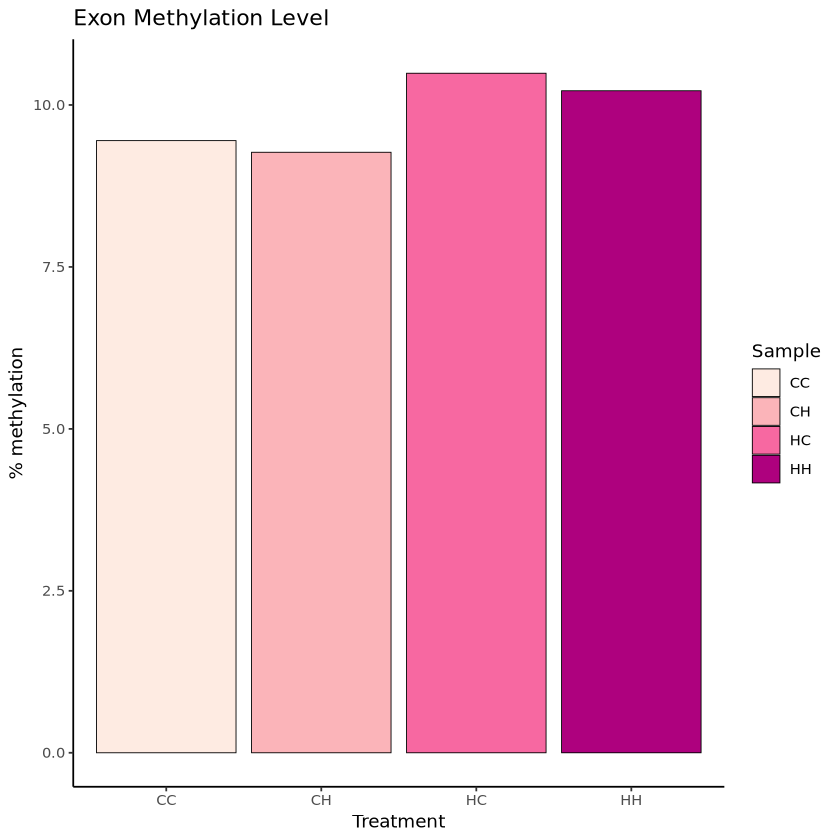

In [35]:
ggplot(exon_df, aes(x = Sample, y = ME_Level, fill = Sample)) +
  geom_bar(stat = "identity") +
scale_fill_brewer(palette = "RdPu",  direction = 1) +
geom_col(color = "black", size = 0.25) +
  labs(title = "Exon Methylation Level", x = "Treatment", y = "% methylation") +
  theme_classic()

In [51]:
p1c <- filter(exon_df, exon_df$Sample %in% c('CC','CH'))

p1h <- filter(exon_df, exon_df$Sample %in% c('HC','HH'))

t.test(p1c$ME_Level, p1h$ME_Level)


	Welch Two Sample t-test

data:  p1c$ME_Level and p1h$ME_Level
t = -6.1325, df = 1.7423, p-value = 0.03523
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.8020356 -0.1879644
sample estimates:
mean of x mean of y 
    9.360    10.355 


so the difference in methylation level of exons is statistically significant between first exposure to control vs. hypoxia

In [61]:
exon_df$phase1 <- ifelse(exon_df$Sample == 'CC', 'control',
                           ifelse(exon_df$Sample == 'CH', 'control', 'hypoxia'))

exon_df$phase2 <- ifelse(exon_df$Sample == 'CC', 'control',
                           ifelse(exon_df$Sample == 'HC', 'control', 'hypoxia'))

In [62]:
exon_df

ME_Level,Sample,phase1,phase2
<dbl>,<chr>,<chr>,<chr>
9.45,CC,control,control
10.49,HC,hypoxia,control
10.22,HH,hypoxia,hypoxia
9.27,CH,control,hypoxia


#### methylation level of introns

In [ ]:
# hypoxic control files
HC_files=("2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam" "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam")

bedtools multicov -bams "${HC_files[@]}" -bed $intron_bed > ${output_dir}HC_multicov_intron.csv

In [ ]:
# control hypoxic files
CH_files=("2018--WBG-BBB-W56-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam" "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam")

bedtools multicov -bams "${CH_files[@]}" -bed $intron_bed > ${output_dir}CH_multicov_intron.csv

In [ ]:
# hypoxic hypoxic files
HH_files=("2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam" "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam" "2018--BBR-BBY-B26-CV_sorted.bam")

bedtools multicov -bams "${HH_files[@]}" -bed $intron_bed > ${output_dir}HH_multicov_intron.csv

In [ ]:
# control control files
CC_files=("2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam")

bedtools multicov -bams "${CC_files[@]}" -bed $intron_bed > ${output_dir}CC_multicov_intron.csv

#### methylation level of introns

In [7]:
CC_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_multicov_intron.csv", sep='\t')
CH_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_multicov_intron.csv", sep='\t')
HC_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_multicov_intron.csv", sep='\t')
HH_intron <- read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_multicov_intron.csv", sep='\t')

In [8]:
# CONTROL CONTROL

# Calculate average counts of last 5 columns
CC_intron$avg_counts <- rowMeans(CC_intron[, tail(names(CC_intron), 5)])

# Remove rows with averages below 5
CC_filtered <- CC_intron[CC_intron$avg_counts >= 5, ]

# Remove temporary average column
CC_filtered$avg_counts <- NULL

CCmethyl_intron <- dim(CC_filtered)[1]
total_intron <- dim(CC_intron)[1]
CC_level_intron <- round((CCmethyl_intron/total_intron)*100, 2)

print(paste(CCmethyl_intron, "methylated introns and", total_intron, "total intons"))
print(paste("intron methylation level of CC:", (CCmethyl_intron)/(total_intron)*100))

[1] "12549 methylated introns and 311167 total intons"
[1] "intron methylation level of CC: 4.03288266429281"


In [9]:
# CONTROL HYPOXIC

# Calculate average counts of last 5 columns
CH_intron$avg_counts <- rowMeans(CH_intron[, tail(names(CH_intron), 5)])

# Remove rows with averages below 5
CH_filtered <- CH_intron[CH_intron$avg_counts >= 5, ]

# Remove temporary average column
CH_filtered$avg_counts <- NULL

CHmethyl_intron <- dim(CH_filtered)[1]
total_intron <- dim(CH_intron)[1]
CH_level_intron <- round((CHmethyl_intron/total_intron)*100, 2)

print(paste(CHmethyl_intron, "methylated introns and", total_intron, "total introns"))
print(paste("intron methylation level of CH:", (CHmethyl_intron)/(total_intron)*100))

[1] "12560 methylated introns and 311167 total introns"
[1] "intron methylation level of CH: 4.03641774352679"


In [10]:
# HYPOXIC HYPOXIC

# Calculate average counts of last 5 columns
HH_intron$avg_counts <- rowMeans(HH_intron[, tail(names(HH_intron), 5)])

# Remove rows with averages below 5
HH_filtered <- HH_intron[HH_intron$avg_counts >= 5, ]

# Remove temporary average column
HH_filtered$avg_counts <- NULL

HHmethyl_intron <- dim(HH_filtered)[1]
total_intron <- dim(HH_intron)[1]
HH_level_intron <- round((HHmethyl_intron/total_intron)*100, 2)

print(paste(HHmethyl_intron, "methylated introns and", total_intron, "total introns"))
print(paste("intron methylation level of HH:", (HHmethyl_intron)/(total_intron)*100))

[1] "14738 methylated introns and 311167 total introns"
[1] "intron methylation level of HH: 4.73636343185492"


In [11]:
# HYPOXIC CONTROL

# Calculate average counts of last 5 columns
HC_intron$avg_counts <- rowMeans(HC_intron[, tail(names(HC_intron), 5)])

# Remove rows with averages below 5
HC_filtered <- HC_intron[HC_intron$avg_counts >= 5, ]

# Remove temporary average column
HC_filtered$avg_counts <- NULL

HCmethyl_intron <- dim(HC_filtered)[1]
total_intron <- dim(HC_intron)[1]
HC_level_intron <- round((HCmethyl_intron/total_intron)*100, 2)

print(paste(HCmethyl_intron, "methylated introns and", total_intron, "total introns"))
print(paste("intron methylation level of HC:", (HCmethyl_intron)/(total_intron)*100))

[1] "15900 methylated introns and 311167 total introns"
[1] "intron methylation level of HC: 5.10979634729904"


In [12]:
intron_me_level <- tibble(CC = CC_level_intron, HC = HC_level_intron, HH = HH_level_intron, CH = CH_level_intron)
intron_me_level

CC,HC,HH,CH
<dbl>,<dbl>,<dbl>,<dbl>
4.03,5.11,4.74,4.04


In [13]:
intron_df <- intron_me_level %>% 
  t() %>% 
  as.data.frame() %>% 
  setNames(c("ME_Level")) %>%  # rename the single column
  mutate(Sample = rownames(.)) %>%  # add Sample column
  `rownames<-`(NULL)  # remove row names

intron_df

ME_Level,Sample
<dbl>,<chr>
4.03,CC
5.11,HC
4.74,HH
4.04,CH


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


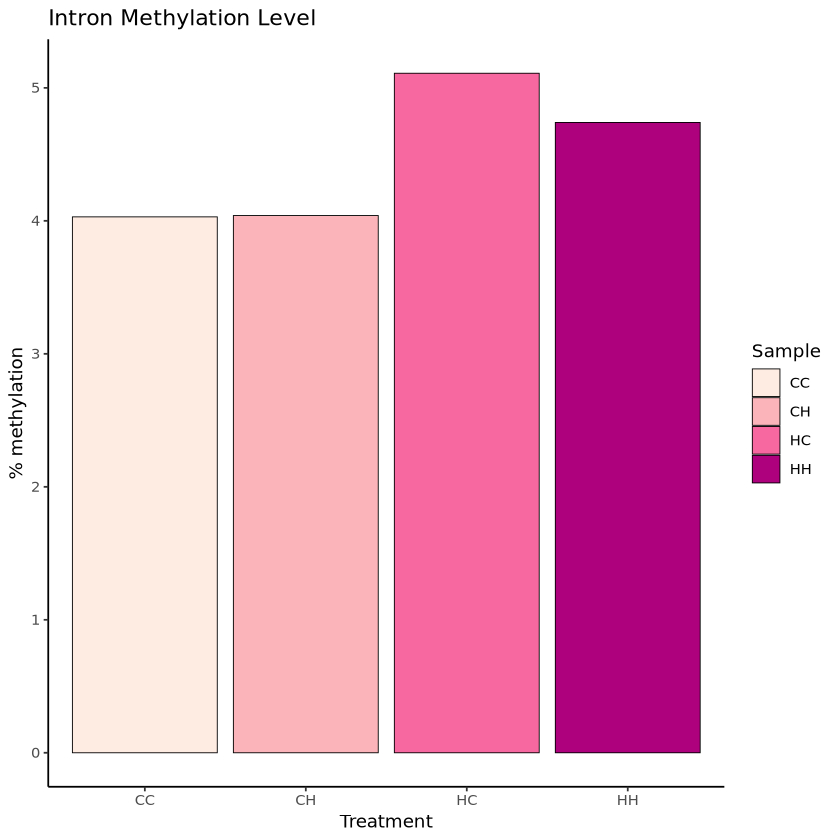

In [15]:
ggplot(intron_df, aes(x = Sample, y = ME_Level, fill = Sample)) +
  geom_bar(stat = "identity") +
geom_col(color = "black", size = 0.25) +
 scale_fill_brewer(palette = "RdPu", direction = 1) +
  labs(title = "Intron Methylation Level", x = "Treatment", y = "% methylation") +
  theme_classic()

# CG motif

In [20]:
CG_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CG_motif_multicov.csv', sep='\t')
dim(CG_multicov)
head(CG_multicov)

[1] 14458702       24

,NC_035780.1,X28,X30,CG_motif,X0,X0.1,X0.2,X0.3,X0.4,X0.5,⋯,X0.10,X0.11,X0.12,X0.13,X0.14,X0.15,X0.16,X0.17,X0.18,X0.19
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [21]:
bam_files <- dir(path = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/BEDtools/working_BAM_sequences/", pattern = "^.*\\.bam$", full.names = FALSE, ignore.case = TRUE, all.files = TRUE)
bam_files

[1] "2018--BBB-WBO-B21-CV_sorted.bam" "2018--BBB-WBV-B70-CV_sorted.bam"
 [3] "2018--BBO-BBO-B16-CV_sorted.bam" "2018--BBO-BBY-B27-CV_sorted.bam"
 [5] "2018--BBO-WBO-B16-CV_sorted.bam" "2018--BBO-WBV-B64-CV_sorted.bam"
 [7] "2018--BBR-BBB-B50-CV_sorted.bam" "2018--BBR-BBG-B38-CV_sorted.bam"
 [9] "2018--BBR-BBY-B26-CV_sorted.bam" "2018--BBY-WBG-B42-CV_sorted.bam"
[11] "2018--WBB-WBV-W69-CV_sorted.bam" "2018--WBG-BBB-W56-CV_sorted.bam"
[13] "2018--WBG-WBG-W44-CV_sorted.bam" "2018--WBO-BBR-W03-CV_sorted.bam"
[15] "2018--WBO-WBV-W64-CV_sorted.bam" "2018--WBR-BBY-W25-CV_sorted.bam"
[17] "2018--WBV-WBO-W23-CV_sorted.bam" "2018--WBV-WBR-W12-CV_sorted.bam"
[19] "2018--WBY-BBV-W65-CV_sorted.bam" "2018--WBY-BBY-W30-CV_sorted.bam"

In [22]:
# clean sample names
bam_files_clean <- gsub("^2018--|-CV_sorted\\.bam$", "", bam_files)
bam_files_clean

[1] "BBB-WBO-B21" "BBB-WBV-B70" "BBO-BBO-B16" "BBO-BBY-B27" "BBO-WBO-B16"
 [6] "BBO-WBV-B64" "BBR-BBB-B50" "BBR-BBG-B38" "BBR-BBY-B26" "BBY-WBG-B42"
[11] "WBB-WBV-W69" "WBG-BBB-W56" "WBG-WBG-W44" "WBO-BBR-W03" "WBO-WBV-W64"
[16] "WBR-BBY-W25" "WBV-WBO-W23" "WBV-WBR-W12" "WBY-BBV-W65" "WBY-BBY-W30"

In [23]:
colnames(CG_multicov) <- c('chromosome', 'start', 'stop', 'CG_motif', bam_files_clean)
head(CG_multicov)

,chromosome,start,stop,CG_motif,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,⋯,WBB-WBV-W69,WBG-BBB-W56,WBG-WBG-W44,WBO-BBR-W03,WBO-WBV-W64,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [24]:
# Base columns
base_cols <- CG_multicov[, c("chromosome", "start", "stop", "CG_motif")]

########################################################################
## HYPOXIC CONTROL

# Additional columns matching pattern
HC_cols <- CG_multicov[, grepl("BB.-WB.-\\w{3}", names(CG_multicov))]

# Create new data frame
HC_multicov <- cbind(base_cols, HC_cols)

write.csv(HC_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/HC_CpGmulticov.csv")

########################################################################
## HYPOXIC HYPOXIC

# Additional columns matching pattern
HH_cols <- CG_multicov[, grepl("BB.-BB.-\\w{3}", names(CG_multicov))]

# Create new data frame
HH_multicov <- cbind(base_cols, HH_cols)

write.csv(HH_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/HH_CpGmulticov.csv")

########################################################################
## CONTROL HYPOXIC

# Additional columns matching pattern
CH_cols <- CG_multicov[, grepl("WB.-BB.-\\w{3}", names(CG_multicov))]

# Create new data frame
CH_multicov <- cbind(base_cols, CH_cols)

write.csv(CH_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CH_CpGmulticov.csv")

########################################################################
# CONTROL CONTROL

# Additional columns matching pattern
CC_cols <- CG_multicov[, grepl("WB.-WB.-\\w{3}", names(CG_multicov))]

# Create new data frame
CC_multicov <- cbind(base_cols, CC_cols)

write.csv(CC_multicov, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CC_CpGmulticov.csv")

########################################################################
head(HC_multicov)
head(HH_multicov)
head(CH_multicov)
head(CC_multicov)

,chromosome,start,stop,CG_motif,BBB-WBO-B21,BBB-WBV-B70,BBO-WBO-B16,BBO-WBV-B64,BBY-WBG-B42
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,chromosome,start,stop,CG_motif,BBO-BBO-B16,BBO-BBY-B27,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,chromosome,start,stop,CG_motif,WBG-BBB-W56,WBO-BBR-W03,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,chromosome,start,stop,CG_motif,WBB-WBV-W69,WBG-WBG-W44,WBO-WBV-W64,WBV-WBO-W23,WBV-WBR-W12
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


## calculate *overall* methylation level

(number of methylated CG)/(total CG)

methylated CG being those that have an average of 5 sequences over the 5 sample replicates



In [72]:
# read in files so don't have to run code from above
CC_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CC_CpGmulticov.csv')
CH_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/CH_CpGmulticov.csv')
HC_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HC_CpGmulticov.csv')
HH_multicov <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/CpG_multicov/HH_CpGmulticov.csv')

**CONTROL CONTROL**

In [73]:
# Calculate average counts of last 5 columns
CC_multicov$avg_counts <- rowMeans(CC_multicov[, tail(names(CC_multicov), 5)])

# Remove rows with averages below 5
CC_filtered <- CC_multicov[CC_multicov$avg_counts >= 5, ]

# Remove temporary average column
CC_filtered$avg_counts <- NULL


############## methylation level ##############
CC_CGmethyl <- dim(CC_filtered)[1]
total_CG <- dim(CC_multicov)[1]

CCpercent_me <- round((CC_CGmethyl/total_CG)*100,2)
print(paste(CCpercent_me, "% of CpG dinucleotide is methylated"))


[1] "0.74 % of CpG dinucleotide is methylated"


**CONTROL HYPOXIC**

In [74]:
# Calculate average counts of last 5 columns
CH_multicov$avg_counts <- rowMeans(CH_multicov[, tail(names(CH_multicov), 5)])

# Remove rows with averages below 5
CH_filtered <- CH_multicov[CH_multicov$avg_counts >= 5, ]

# Remove temporary average column
CH_filtered$avg_counts <- NULL


############## methylation level ##############
CH_CGmethyl <- dim(CH_filtered)[1]
total_CG <- dim(CH_multicov)[1]

CHpercent_me <- round((CH_CGmethyl/total_CG)*100,2)
print(paste(CHpercent_me, "% of CpG dinucleotide is methylated"))


[1] "0.77 % of CpG dinucleotide is methylated"


**HYPOXIC HYPOXIC**

In [75]:
# Calculate average counts of last 5 columns
HH_multicov$avg_counts <- rowMeans(HH_multicov[, tail(names(HH_multicov), 5)])

# Remove rows with averages below 5
HH_filtered <- HH_multicov[HH_multicov$avg_counts >= 5, ]

# Remove temporary average column
HH_filtered$avg_counts <- NULL


############## methylation level ##############
HH_CGmethyl <- dim(HH_filtered)[1]
total_CG <- dim(HH_multicov)[1]

HHpercent_me <- round((HH_CGmethyl/total_CG)*100,2)
print(paste(HHpercent_me, "% of CpG dinucleotide is methylated"))


[1] "0.9 % of CpG dinucleotide is methylated"


**HYPOXIC CONTROL**

In [84]:
# Calculate average counts of last 5 columns
HC_multicov$avg_counts <- rowMeans(HC_multicov[, tail(names(HC_multicov), 5)])

# Remove rows with averages below 5
HC_filtered <- HC_multicov[HC_multicov$avg_counts >= 5, ]

# Remove temporary average column
HC_filtered$avg_counts <- NULL


############## methylation level ##############
HC_CGmethyl <- dim(HC_filtered)[1]
total_CG <- dim(HC_multicov)[1]

HCpercent_me <- round((HC_CGmethyl/total_CG)*100,2)
print(paste(HCpercent_me, "% of CpG dinucleotide is methylated"))


[1] "0.98 % of CpG dinucleotide is methylated"


In [81]:
CpG_methyl <- tibble(
    CH = CHpercent_me,
    HH = HHpercent_me,
    HC = HCpercent_me,
    CC = CCpercent_me)

CpG_methyl <- CpG_methyl %>% 
  t() %>% 
  as.data.frame() %>% 
  setNames(c("percent_me")) %>%  # rename the single column
  mutate(treatment = rownames(.)) %>%  # add Sample column
  `rownames<-`(NULL)  # remove row names

CpG_methyl

percent_me,treatment
<dbl>,<chr>
0.77,CH
0.90,HH
1.00,HC
0.74,CC


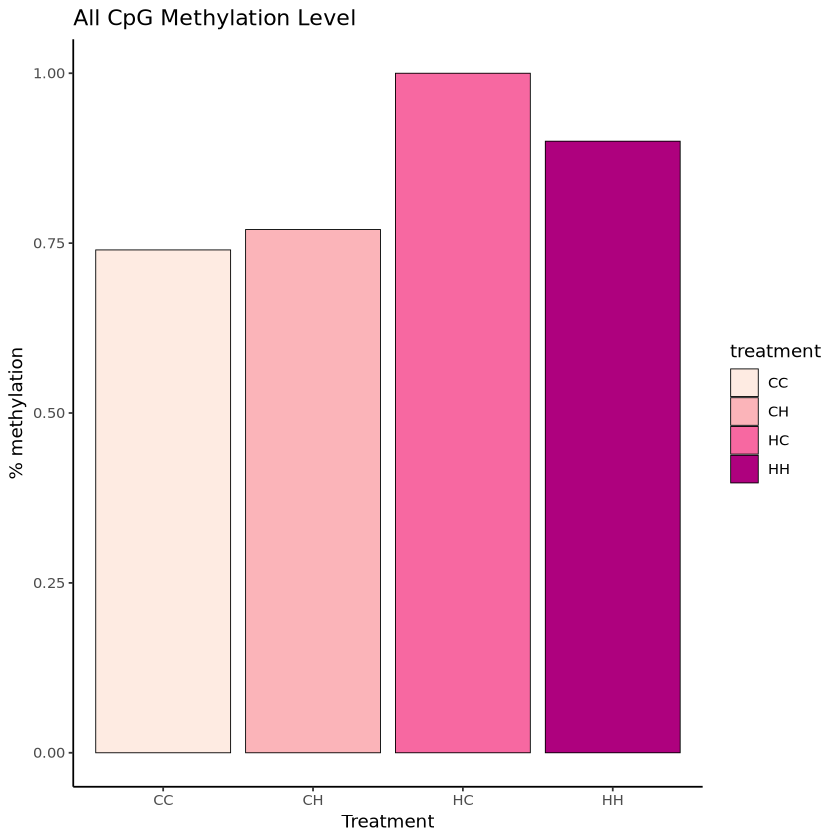

In [82]:
ggplot(CpG_methyl, aes(x = treatment, y = percent_me, fill = treatment)) +
  geom_bar(stat = "identity") +
scale_fill_brewer(palette = "RdPu", 
 direction = 1) +
geom_col(color = "black", size = 0.25) +
  labs(title = "All CpG Methylation Level", x = "Treatment", y = "% methylation") +
  theme_classic()

In [30]:
cont <- c(CHpercent_me, CCpercent_me)
hyp <- c(HHpercent_me, HCpercent_me)

t.test(cont, hyp)


	Welch Two Sample t-test

data:  cont and hyp
t = -3.7355, df = 1.1786, p-value = 0.1363
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6621801  0.2721801
sample estimates:
mean of x mean of y 
    0.755     0.950 


### overlap of methylated CpG with gene features

run in command line:

In [31]:
# gene feature BED files
exonList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_exon_sorted.gff3"
intronList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_intron.gff3"
exonUTR="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_exonUTR.gff3"
promoterList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/mRNA_promoter_track.bed"
intergenicList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_intergenic.gff3"
teList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/Venkataraman_files/C_virginica-3.0_TE-all.gff"
geneList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_gene_sorted.gff3"
noncodingList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_noncoding.gff3"
cdsList='/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_CDS_sorted.gff3'

# CpG dinucleotide list
cpgList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/C_virginica-3.0_CG-motif.bed"


In [2]:
# gene feature BED files
exonList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_exon_sorted.gff3"
intronList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_intron.gff3"
exonUTR="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_exonUTR.bed"
promoterList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/mRNA_promoter_track.bed"
intergenicList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_intergenic.gff3"
teList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/Venkataraman_files/C_virginica-3.0_TE-all.gff"
geneList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_gene_sorted.gff3"
noncodingList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/CV_noncoding.gff3"

# CpG dinucleotide list
cpgList="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/C_virginica-3.0_CG-motif.bed"


ERROR: Error: object 'exonList' not found


**all CpG dinucleotides** 

In [ ]:
bedtools intersect -u -a $cpgList -b $geneList | wc -l
echo "total CpG dinucleotides in genes"

7774742 CpG motifs overlap with genes

In [ ]:
bedtools intersect -u -a $cpgList -b $exonList | wc -l
echo "total CpG dinucleotides in exons"

2330546 CpG motifs overlap with exons

In [ ]:
bedtools intersect -u -a $cpgList -b $intronList | wc -l
echo "total CpG dinucleotides in introns"

5497874 CpG motifs overlap with introns

In [ ]:
bedtools intersect -u -a $cpgList -b $exonUTR | wc -l
echo "total CpG dinucleotides in UTRs"

602551 CpG motifs overlap with exon UTRs

In [ ]:
bedtools intersect -u -a $cpgList -b $promoterList | wc -l
echo "total CpG dinucleotides in putative promoters"

926518 CpG motifs overlap with putative promoters

In [ ]:
bedtools intersect -u -a $cpgList -b $intergenicList | wc -l
echo "total CpG dinucleotides in intergenic regions"

6644297 CpG motifs overlap with intergenic regions

In [ ]:
bedtools intersect -u -a $cpgList -b $noncodingList | wc -l
echo "total CpG dinucleotides in non-coding regions"

12142171 CpG motifs overlap with non-coding regions

In [ ]:
bedtools intersect -u -a $cpgList -b $teList | wc -l
echo "total CpG dinucleotides in transposable elements"

2828372 CpG motifs overlap with intergenic regions

In [ ]:
bedtools intersect -u -a $cpgList -b $cdsList | wc -l
echo "total CpG dinucleotides in coding sequences"

1728032 total CpG dinucleotides in coding sequences

#### methylated CpG by treatment

first, filtering treatment CpG motifs - a CpG dinucleotide is considered methylated if the average count across the four replicates is greater than or equal to 4. This ensures that we're not counting a CpG methylated if one sample has a count of 15 and the rest have 0.

In [46]:
# Calculate average counts of last 5 columns
CH_multicov$avg_counts <- rowMeans(CH_multicov[, tail(names(CH_multicov), 5)])

# Remove rows with averages below 5
CH_filtered <- CH_multicov[CH_multicov$avg_counts >= 5, ]

# Remove temporary average column
CH_filtered$avg_counts <- NULL

CH_bed <- select(CH_filtered, chromosome, start, stop)
rownames(CH_bed) <- NULL
head(CH_bed)

write.table(CH_bed[, c("chromosome", "start", "stop")], 
            file = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CH_cpgMethyl.bed", 
            sep = "\t", 
            #header = FALSE, 
            quote = FALSE, 
            row.names = FALSE, 
            col.names = FALSE)

,chromosome,start,stop
,<chr>,<int>,<int>
1,NC_035780.1,23615,23617
2,NC_035780.1,23620,23622
3,NC_035780.1,23624,23626
4,NC_035780.1,23631,23633
5,NC_035780.1,23638,23640
6,NC_035780.1,198167,198169


In [45]:
# Calculate average counts of last 5 columns
CC_multicov$avg_counts <- rowMeans(CC_multicov[, tail(names(CC_multicov), 5)])

# Remove rows with averages below 5
CC_filtered <- CH_multicov[CC_multicov$avg_counts >= 5, ]

# Remove temporary average column
CC_filtered$avg_counts <- NULL

CC_bed <- select(CC_filtered, chromosome, start, stop)
rownames(CC_bed) <- NULL
head(CC_bed)

write.table(CC_bed[, c("chromosome", "start", "stop")], 
            file = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/CC_cpgMethyl.bed", 
            sep = "\t", 
            #header = FALSE, 
            quote = FALSE, 
            row.names = FALSE, 
            col.names = FALSE)

,chromosome,start,stop
,<chr>,<int>,<int>
1,NC_035780.1,23615,23617
2,NC_035780.1,23620,23622
3,NC_035780.1,23624,23626
4,NC_035780.1,23631,23633
5,NC_035780.1,23638,23640
6,NC_035780.1,162717,162719


In [47]:
# Calculate average counts of last 5 columns
HH_multicov$avg_counts <- rowMeans(HH_multicov[, tail(names(HH_multicov), 5)])

# Remove rows with averages below 5
HH_filtered <- HH_multicov[HH_multicov$avg_counts >= 5, ]

# Remove temporary average column
HH_filtered$avg_counts <- NULL

HH_bed <- select(HH_filtered, chromosome, start, stop)
rownames(HH_bed) <- NULL
head(HH_bed)

write.table(HH_bed[, c("chromosome", "start", "stop")], 
            file = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/HH_cpgMethyl.bed", 
            sep = "\t", 
            #header = FALSE, 
            quote = FALSE, 
            row.names = FALSE, 
            col.names = FALSE)

,chromosome,start,stop
,<chr>,<int>,<int>
1,NC_035780.1,17176,17178
2,NC_035780.1,20142,20144
3,NC_035780.1,20149,20151
4,NC_035780.1,20157,20159
5,NC_035780.1,20170,20172
6,NC_035780.1,23584,23586


In [48]:
# Calculate average counts of last 5 columns
HC_multicov$avg_counts <- rowMeans(HC_multicov[, tail(names(HC_multicov), 5)])

# Remove rows with averages below 5
HC_filtered <- HC_multicov[HC_multicov$avg_counts >= 5, ]

# Remove temporary average column
HC_filtered$avg_counts <- NULL

HC_bed <- select(HC_filtered, chromosome, start, stop)
rownames(HC_bed) <- NULL
head(HC_bed)

write.table(HC_bed[, c("chromosome", "start", "stop")], 
            file = "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/HC_cpgMethyl.bed", 
            sep = "\t", 
            #header = FALSE, 
            quote = FALSE, 
            row.names = FALSE, 
            col.names = FALSE)

,chromosome,start,stop
,<chr>,<int>,<int>
1,NC_035780.1,17176,17178
2,NC_035780.1,20142,20144
3,NC_035780.1,20149,20151
4,NC_035780.1,20157,20159
5,NC_035780.1,20170,20172
6,NC_035780.1,23615,23617


In [49]:
# CpG lists for each treatment
input_dir="/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/genomic_features/"
CC_CpG=${input_dir}"CC_cpgMethyl.bed"
CH_CpG=${input_dir}"CH_cpgMethyl.bed"
HC_CpG=${input_dir}"HC_cpgMethyl.bed"
HH_CpG=${input_dir}"HH_cpgMethyl.bed"

**methylated CpG in genes**

In [ ]:
bedtools intersect -u -a $CC_CpG -b $geneList | wc -l
echo "methylated CpG for cont cont overlaps with genes"

bedtools intersect -u -a $CH_CpG -b $geneList | wc -l
echo "methylated CpG for cont hyp overlaps with genes"

bedtools intersect -u -a $HC_CpG -b $geneList | wc -l
echo "methylated CpG for hyp cont overlaps with genes"

bedtools intersect -u -a $HH_CpG -b $geneList | wc -l
echo "methylated CpG for hyp hyp overlaps with genes"

75361 methylated CpG for cont cont overlaps with genes

78373 methylated CpG for cont hyp overlaps with genes

108269 methylated CpG for hyp cont overlaps with genes

99120 methylated CpG for hyp hyp overlaps with genes

**methylated CpG in exons**

In [ ]:
bedtools intersect -u -a $CC_CpG -b $exonList | wc -l
echo "methylated CpG for cont cont overlaps with exons"

bedtools intersect -u -a $CH_CpG -b $exonList | wc -l
echo "methylated CpG for cont hyp overlaps with exons"

bedtools intersect -u -a $HC_CpG -b $exonList | wc -l
echo "methylated CpG for hyp cont overlaps with exons"

bedtools intersect -u -a $HH_CpG -b $exonList | wc -l
echo "methylated CpG for hyp hyp overlaps with exons"

51436 methylated CpG for cont cont overlaps with exons

52475 methylated CpG for cont hyp overlaps with exons

67166 methylated CpG for hyp cont overlaps with exons

63302 methylated CpG for hyp hyp overlaps with exons


**methylated CpG in introns**

In [ ]:
bedtools intersect -u -a $CC_CpG -b $intronList | wc -l
echo "methylated CpG for cont cont overlaps with introns"

bedtools intersect -u -a $CH_CpG -b $intronList | wc -l
echo "methylated CpG for cont hyp overlaps with introns"

bedtools intersect -u -a $HC_CpG -b $intronList | wc -l
echo "methylated CpG for hyp cont overlaps with introns"

bedtools intersect -u -a $HH_CpG -b $intronList | wc -l
echo "methylated CpG for hyp hyp overlaps with introns"

24630 methylated CpG for cont cont overlaps with introns

26655 methylated CpG for cont hyp overlaps with introns

42077 methylated CpG for hyp cont overlaps with introns

36738 methylated CpG for hyp hyp overlaps with introns

**methylated CpG in putative promoters**

In [ ]:
bedtools intersect -u -a $CC_CpG -b $promoterList | wc -l
echo "methylated CpG for cont cont overlaps with promoters"

bedtools intersect -u -a $CH_CpG -b $promoterList | wc -l
echo "methylated CpG for cont hyp overlaps with promoters"

bedtools intersect -u -a $HC_CpG -b $promoterList | wc -l
echo "methylated CpG for hyp cont overlaps with promoters"

bedtools intersect -u -a $HH_CpG -b $promoterList | wc -l
echo "methylated CpG for hyp hyp overlaps with promoters"

2816 methylated CpG for cont cont overlaps with promoters

3271 methylated CpG for cont hyp overlaps with promoters

5399 methylated CpG for hyp cont overlaps with promoters

4674 methylated CpG for hyp hyp overlaps with promoters

**methylated CpG in exon UTRs**

In [ ]:
bedtools intersect -u -a $CC_CpG -b $exonUTR | wc -l
echo "methylated CpG for cont cont overlaps with UTRs"

bedtools intersect -u -a $CH_CpG -b $exonUTR | wc -l
echo "methylated CpG for cont hyp overlaps with UTRs"

bedtools intersect -u -a $HC_CpG -b $exonUTR | wc -l
echo "methylated CpG for hyp cont overlaps with UTRs"

bedtools intersect -u -a $HH_CpG -b $exonUTR | wc -l
echo "methylated CpG for hyp hyp overlaps with UTRs"

3730 methylated CpG for cont cont overlaps with UTRs

3833 methylated CpG for cont hyp overlaps with UTRs

5028 methylated CpG for hyp cont overlaps with UTRs

4698 methylated CpG for hyp hyp overlaps with UTRs


**methylated CpG in transposable elements**

In [ ]:
bedtools intersect -u -a $CC_CpG -b $teList | wc -l
echo "methylated CpG for cont cont overlaps with TEs"

bedtools intersect -u -a $CH_CpG -b $teList | wc -l
echo "methylated CpG for cont hyp overlaps with TEs"

bedtools intersect -u -a $HC_CpG -b $teList | wc -l
echo "methylated CpG for hyp cont overlaps with TEs"

bedtools intersect -u -a $HH_CpG -b $teList | wc -l
echo "methylated CpG for hyp hyp overlaps with TEs"

13950 methylated CpG for cont cont overlaps with TEs

15377 methylated CpG for cont hyp overlaps with TEs

23916 methylated CpG for hyp cont overlaps with TEs

21942 methylated CpG for hyp hyp overlaps with TEs

**methylated CpG in intergenic regions**

In [ ]:
bedtools intersect -u -a $CC_CpG -b $intergenicList | wc -l
echo "methylated CpG for cont cont overlaps with intergenic regions"

bedtools intersect -u -a $CH_CpG -b $intergenicList | wc -l
echo "methylated CpG for cont hyp overlaps with intergenic regions"

bedtools intersect -u -a $HC_CpG -b $intergenicList | wc -l
echo "methylated CpG for hyp cont overlaps with intergenic regions"

bedtools intersect -u -a $HH_CpG -b $intergenicList | wc -l
echo "methylated CpG for hyp hyp overlaps with intergenic regions"

15623 methylated CpG for cont cont overlaps with intergenic regions

18016 methylated CpG for cont hyp overlaps with intergenic regions

31804 methylated CpG for hyp cont overlaps with intergenic regions

26827 methylated CpG for hyp hyp overlaps with intergenic regions


## no overlaps with genomic features

CpGs that do not overlap any feature (aka unannotated intergenic regions)

In [ ]:
# CpG motif
bedtools intersect -v -a $cpgList -b $exonList $intronList $teList $promoterList | wc -l
echo "CpG motifs do not overlap with exons, introns, transposable elements (all), or putative promoters"

4499027 CpG motifs do not overlap with exons, introns, transposable elements (all), or putative promoters

In [ ]:
bedtools intersect -v -a $CC_CpG -b $exonList $intronList $teList $promoterList | wc -l
echo "methylated CpG for cont cont do not overlap with exons, introns, transposable elements (all), or putative promoters"

bedtools intersect -u -a $CH_CpG -b $exonList $intronList $teList $promoterList | wc -l
echo "methylated CpG for cont hyp do not overlap with exons, introns, transposable elements (all), or putative promoters"

bedtools intersect -u -a $HC_CpG -b $exonList $intronList $teList $promoterList | wc -l
echo "methylated CpG for hyp cont do not overlap with exons, introns, transposable elements (all), or putative promoters"

bedtools intersect -u -a $HH_CpG -b $exonList $intronList $teList $promoterList | wc -l
echo "methylated CpG for hyp hyp do not overlap with exons, introns, transposable elements (all), or putative promoters"

9728 methylated CpG for cont cont do not overlap with exons, introns, transposable elements (all), or putative promoters

86083 methylated CpG for cont hyp do not overlap with exons, introns, transposable elements (all), or putative promoters

121018 methylated CpG for hyp cont do not overlap with exons, introns, transposable elements (all), or putative promoters

110551 methylated CpG for hyp hyp do not overlap with exons, introns, transposable elements (all), or putative promoters